# Lattice computations

In [1]:
import openmc
from IPython.display import Image

In this section, we will build one of the assemblies from the BEAVRS benchmark.  This is a PWR assembly with fuel pins, guide tubes, and borosilicate glass burnable poisons.  A diagram of th assembly is plotted below.  To make it a little easier (and improve our statistics!) we will only build one quarter of it.

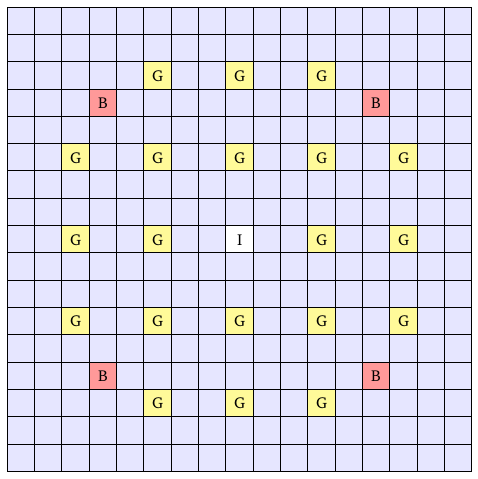

In [2]:
Image('assembly_diagram.png')

## Materials

We have the same UO2, Zr, and H2O from the pincell example.  We also have borosilicate glass (pyrex).  Note the shortcut of calling `add_nuclide` and `add_element` without initializing a nuclide/element.

In [3]:
uo2 = openmc.Material(name='uo2')
uo2.add_nuclide('U-235', 0.02115, 'wo')
uo2.add_nuclide('U-238', 0.86032, 'wo')
uo2.add_nuclide('O-16', 0.11852, 'wo')
uo2.set_density('g/cm3', 10.3)

zirconium = openmc.Material(name='zirconium')
zirconium.add_element('Zr', 1.0)
zirconium.set_density('g/cm3', 6.55)

water = openmc.Material(name='water')
water.add_nuclide('H-1', 2)
water.add_nuclide('O-16', 1)
water.set_density('g/cm3', 0.701)
water.add_s_alpha_beta('hh2o', '71t')

pyrex = openmc.Material(name='pyrex')
pyrex.add_element('B', 4.88396e-3)
pyrex.add_element('O', 4.6624e-2)
pyrex.add_element('Al', 1.7352e-3)
pyrex.add_element('Si', 1.83512e-2)
pyrex.set_density('g/cm3', 2.26)

In [4]:
mf = openmc.Materials((uo2, zirconium, water, pyrex))
mf.default_xs = '71c'
mf.export_to_xml()

Later in this example, we will make a bunch of geometry plots.  By default, every region is colored randomly and the results are Now that we know our materials, let's define a "color specification" to use when plotting our geometry.

In [5]:
col_spec = {}
col_spec[water.id] = (100, 200, 200)
col_spec[zirconium.id] = (150, 150, 150)
col_spec[pyrex.id] = (100, 255, 100)
col_spec[uo2.id] = (255, 50, 50)

## Fuel pin

This is similar to the pincell example, but we don't have boundary conditions.  This `fuel_pin` universe extends to infinity

In [6]:
pitch = 1.25984

fuel_or = openmc.ZCylinder(R=0.39218)
clad_ir = openmc.ZCylinder(R=0.40005)
clad_or = openmc.ZCylinder(R=0.45720)

fuel = openmc.Cell(1, 'fuel')
fuel.fill = uo2
fuel.region = -fuel_or

gap = openmc.Cell(2, 'air gap')
gap.fill = 'void'
gap.region = +fuel_or & -clad_ir

clad = openmc.Cell(3, 'clad')
clad.fill = zirconium
clad.region = +clad_ir & -clad_or

moderator = openmc.Cell(4, 'moderator')
moderator.fill = water
moderator.region = +clad_or

fuel_pin = openmc.Universe()
fuel_pin.add_cells((fuel, gap, clad, moderator))

When building a complex geometry, it is helpful to plot each universe as you go along.  Let's plot this pincell now

In [7]:
# We need a cell to contain the fuel_pin universe.
# We also need a boundary condition somewhere to prevent an error message.
main = openmc.Cell()
main.fill = fuel_pin
main.region = +openmc.ZPlane(z0=-10, boundary_type='reflective')

root = openmc.Universe(0)
root.add_cell(main)

g = openmc.Geometry()
g.root_universe = root
g.export_to_xml()

In [8]:
p = openmc.Plot()
p.width = [pitch, pitch]
p.pixels = [400, 400]
p.color = 'mat'
p.col_spec = col_spec

plots = openmc.Plots([p])
plots.export_to_xml()

In [9]:
openmc.plot_geometry()


       .d88888b.                             888b     d888  .d8888b.
      d88P" "Y88b                            8888b   d8888 d88P  Y88b
      888     888                            88888b.d88888 888    888
      888     888 88888b.   .d88b.  88888b.  888Y88888P888 888       
      888     888 888 "88b d8P  Y8b 888 "88b 888 Y888P 888 888       
      888     888 888  888 88888888 888  888 888  Y8P  888 888    888
      Y88b. .d88P 888 d88P Y8b.     888  888 888   "   888 Y88b  d88P
       "Y88888P"  88888P"   "Y8888  888  888 888       888  "Y8888P"
__________________888______________________________________________________
                  888
                  888

      Copyright:      2011-2016 Massachusetts Institute of Technology
      License:        http://openmc.readthedocs.org/en/latest/license.html
      Version:        0.7.1
      Git SHA1:       6a2743f1e12fbc0745ff770f22df8847af859e90
      Date/Time:      2016-05-01 05:23:17

 ========================>     INITIALIZA

0

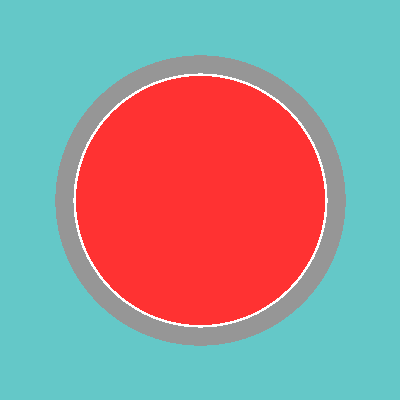

In [10]:
!convert plot.ppm plot.png
Image("plot.png")

## Guide tube

In [11]:
clad_ir = openmc.ZCylinder(R=0.56134)
clad_or = openmc.ZCylinder(R=0.60198)

inner = openmc.Cell()
inner.fill = water
inner.region = -clad_ir

clad = openmc.Cell()
clad.fill = zirconium
clad.region = +clad_ir & -clad_or

outer = openmc.Cell()
outer.fill = water
outer.region = +clad_or

guide_tube = openmc.Universe()
guide_tube.add_cells((inner, clad, outer))

In [12]:
main = openmc.Cell()
main.fill = guide_tube
main.region = +openmc.ZPlane(z0=-10, boundary_type='reflective')

root = openmc.Universe(0)
root.add_cell(main)

g = openmc.Geometry()
g.root_universe = root
g.export_to_xml()

In [13]:
p = openmc.Plot()
p.width = [pitch, pitch]
p.pixels = [400, 400]
p.color = 'mat'
p.col_spec = col_spec

plots = openmc.Plots([p])
plots.export_to_xml()

In [14]:
openmc.plot_geometry()


       .d88888b.                             888b     d888  .d8888b.
      d88P" "Y88b                            8888b   d8888 d88P  Y88b
      888     888                            88888b.d88888 888    888
      888     888 88888b.   .d88b.  88888b.  888Y88888P888 888       
      888     888 888 "88b d8P  Y8b 888 "88b 888 Y888P 888 888       
      888     888 888  888 88888888 888  888 888  Y8P  888 888    888
      Y88b. .d88P 888 d88P Y8b.     888  888 888   "   888 Y88b  d88P
       "Y88888P"  88888P"   "Y8888  888  888 888       888  "Y8888P"
__________________888______________________________________________________
                  888
                  888

      Copyright:      2011-2016 Massachusetts Institute of Technology
      License:        http://openmc.readthedocs.org/en/latest/license.html
      Version:        0.7.1
      Git SHA1:       6a2743f1e12fbc0745ff770f22df8847af859e90
      Date/Time:      2016-05-01 05:23:18

 ========================>     INITIALIZA

0

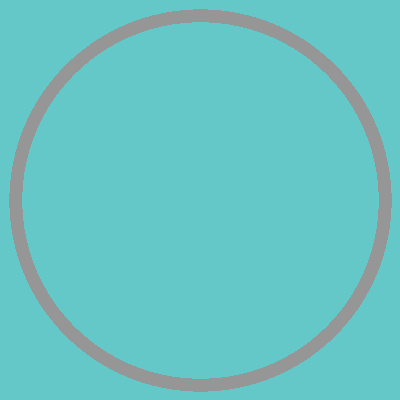

In [15]:
!convert plot.ppm plot.png
Image("plot.png")

## Pyrex burnable poison

In [16]:
# Define the cylinders which bound each radial zone.
radii = [0.21400, 0.23051, 0.24130, 0.42672, 0.43688, 0.48387, 0.56134, 0.60198]
cyls = [openmc.ZCylinder(R=R) for R in radii]

# Initialize a list of cells.
bp_cells = []

# Define the inner void zone first.
c = openmc.Cell()
c.region = -cyls[0]
c.fill = 'void'
bp_cells.append(c)

# Now all the sandwiched layers.
mats = [zirconium, 'void', pyrex, 'void', zirconium, water, zirconium]
for i in range(len(mats)):
    c = openmc.Cell()
    c.region = +cyls[i] & -cyls[i+1]
    c.fill = mats[i]
    bp_cells.append(c)

# And the outer moderator region.
c = openmc.Cell()
c.region = +cyls[-1]
c.fill = water
bp_cells.append(c)

# Make a universe containing these cells
burn = openmc.Universe()
burn.add_cells(bp_cells)

In [17]:
main = openmc.Cell()
main.fill = burn
main.region = +openmc.ZPlane(z0=-10, boundary_type='reflective')

root = openmc.Universe(0)
root.add_cell(main)

g = openmc.Geometry()
g.root_universe = root
g.export_to_xml()

In [18]:
p = openmc.Plot()
p.width = [pitch, pitch]
p.pixels = [400, 400]
p.color = 'mat'
p.col_spec = col_spec

plots = openmc.Plots([p])
plots.export_to_xml()

In [19]:
openmc.plot_geometry()


       .d88888b.                             888b     d888  .d8888b.
      d88P" "Y88b                            8888b   d8888 d88P  Y88b
      888     888                            88888b.d88888 888    888
      888     888 88888b.   .d88b.  88888b.  888Y88888P888 888       
      888     888 888 "88b d8P  Y8b 888 "88b 888 Y888P 888 888       
      888     888 888  888 88888888 888  888 888  Y8P  888 888    888
      Y88b. .d88P 888 d88P Y8b.     888  888 888   "   888 Y88b  d88P
       "Y88888P"  88888P"   "Y8888  888  888 888       888  "Y8888P"
__________________888______________________________________________________
                  888
                  888

      Copyright:      2011-2016 Massachusetts Institute of Technology
      License:        http://openmc.readthedocs.org/en/latest/license.html
      Version:        0.7.1
      Git SHA1:       6a2743f1e12fbc0745ff770f22df8847af859e90
      Date/Time:      2016-05-01 05:23:18

 ========================>     INITIALIZA

0

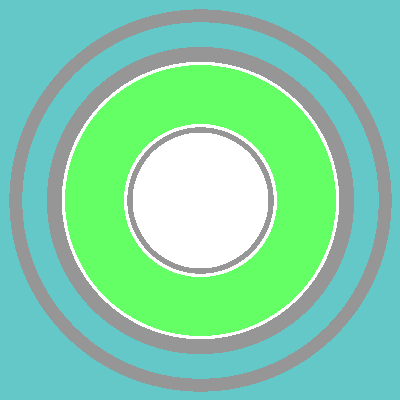

In [20]:
!convert plot.ppm plot.png
Image("plot.png")

## Lattices in OpenMC

OpenMC has `RectLattice` and `HexLattice` objects.  This demo will use a `RectLattice`.  Let's look at a simple one before we do the quarter assembly.

First, we also need to define a universe that is all water.

In [21]:
moderator = openmc.Cell()
moderator.fill = water

all_water = openmc.Universe()
all_water.add_cell(moderator)

In [22]:
lattice = openmc.RectLattice()

# First we specify the dimension---the number of lattice tiles in x and y.
lattice.dimension = [2, 2]

# Next is the lower-left corner of the lattice.
lattice.lower_left = [0.0, 0.0]

# Next is the pitch---the size of the lattice tiles in each direction.
lattice.pitch = [pitch]*2

# Now we specify what is actually inside the lattice.  This 2D lattice will be a
# list of lists like
# lattice.universes = [ [a1, a2, ...], [b1, b2, ...], ...]
# The inner lists specify columns from left to right.  The outer lists specify
# rows from top to bottom.
lattice.universes = [
    [fuel_pin,   fuel_pin],
    [guide_tube, fuel_pin]
]

# We also need to specify what is outside of the lattice.  In this case, it is
# the infinite water universe.
lattice.outer = all_water

In [23]:
main = openmc.Cell()
main.fill = lattice
main.region = +openmc.ZPlane(z0=-10, boundary_type='reflective')

root = openmc.Universe(0)
root.add_cell(main)

g = openmc.Geometry()
g.root_universe = root
g.export_to_xml()

In [24]:
p = openmc.Plot()
p.origin = (pitch, pitch, 0)
p.width = (3*pitch, 3*pitch)
p.pixels = (400, 400)
p.color = 'mat'

col_spec = {}
col_spec[water.id] = (100, 200, 200)
col_spec[zirconium.id] = (150, 150, 150)
col_spec[pyrex.id] = (100, 255, 100)
col_spec[uo2.id] = (255, 50, 50)
p.col_spec = col_spec

plots = openmc.Plots([p])
plots.export_to_xml()

In [25]:
openmc.plot_geometry()


       .d88888b.                             888b     d888  .d8888b.
      d88P" "Y88b                            8888b   d8888 d88P  Y88b
      888     888                            88888b.d88888 888    888
      888     888 88888b.   .d88b.  88888b.  888Y88888P888 888       
      888     888 888 "88b d8P  Y8b 888 "88b 888 Y888P 888 888       
      888     888 888  888 88888888 888  888 888  Y8P  888 888    888
      Y88b. .d88P 888 d88P Y8b.     888  888 888   "   888 Y88b  d88P
       "Y88888P"  88888P"   "Y8888  888  888 888       888  "Y8888P"
__________________888______________________________________________________
                  888
                  888

      Copyright:      2011-2016 Massachusetts Institute of Technology
      License:        http://openmc.readthedocs.org/en/latest/license.html
      Version:        0.7.1
      Git SHA1:       6a2743f1e12fbc0745ff770f22df8847af859e90
      Date/Time:      2016-05-01 05:23:19

 ========================>     INITIALIZA

0

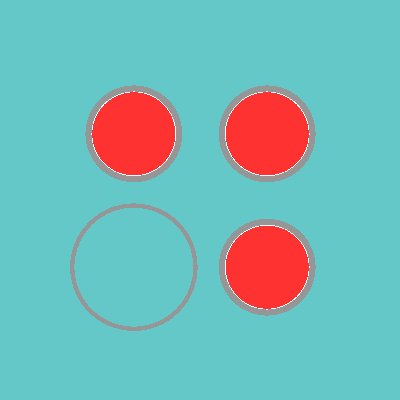

In [26]:
!convert plot.ppm plot.png
Image("plot.png")

## What exactly does `outer` mean?

We are taking that one universe and tiling it infinitely outside the lattice.

In [27]:
# Try a different outer universe to see what I mean
lattice.outer = guide_tube

g.export_to_xml()

openmc.plot_geometry()


       .d88888b.                             888b     d888  .d8888b.
      d88P" "Y88b                            8888b   d8888 d88P  Y88b
      888     888                            88888b.d88888 888    888
      888     888 88888b.   .d88b.  88888b.  888Y88888P888 888       
      888     888 888 "88b d8P  Y8b 888 "88b 888 Y888P 888 888       
      888     888 888  888 88888888 888  888 888  Y8P  888 888    888
      Y88b. .d88P 888 d88P Y8b.     888  888 888   "   888 Y88b  d88P
       "Y88888P"  88888P"   "Y8888  888  888 888       888  "Y8888P"
__________________888______________________________________________________
                  888
                  888

      Copyright:      2011-2016 Massachusetts Institute of Technology
      License:        http://openmc.readthedocs.org/en/latest/license.html
      Version:        0.7.1
      Git SHA1:       6a2743f1e12fbc0745ff770f22df8847af859e90
      Date/Time:      2016-05-01 05:23:20

 ========================>     INITIALIZA

0

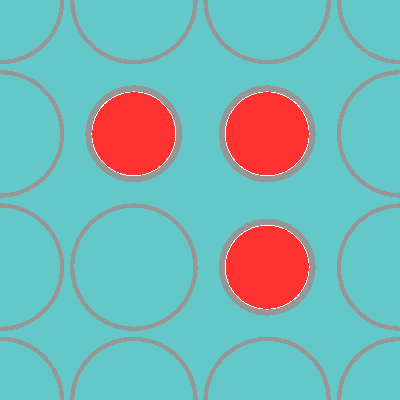

In [28]:
!convert plot.ppm plot.png
Image("plot.png")

## The BEAVRS assembly

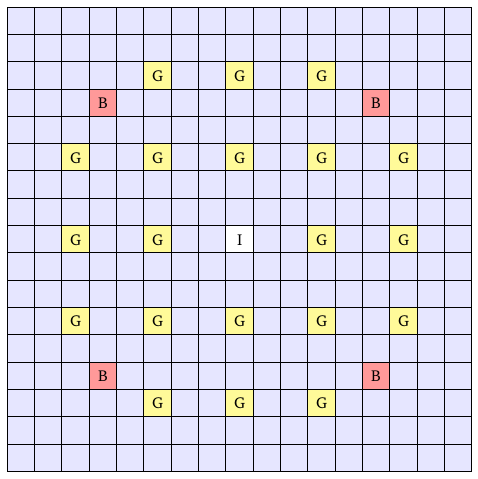

In [29]:
Image('assembly_diagram.png')

In [30]:
lattice = openmc.RectLattice()

lattice.dimension = [9, 9]
lattice.pitch = [pitch]*2
lattice.outer = all_water

# I want (x0, y0) = (0, 0) to be the center of the instrument tube so that means
# the lower-left will be -half a pin pitch in x and y.
lattice.lower_left = [-pitch/2.0]*2

# Most of the lattice positions are fuel pins so rather than type all of those
# out, I will use a Python list comprehension to start with a 9x9 array of fuel.
lattice.universes = [[fuel_pin for i in range(9)] for j in range(9)]

# Then I will replace some fuel pins with guide tubes.  First index is the row,
# starting from the top, and the second is the column (like a matrix).
lattice.universes[2][0] = guide_tube
lattice.universes[2][3] = guide_tube
lattice.universes[5][0] = guide_tube
lattice.universes[5][3] = guide_tube
lattice.universes[5][6] = guide_tube
lattice.universes[8][0] = guide_tube
lattice.universes[8][3] = guide_tube
lattice.universes[8][6] = guide_tube

# And the burnable poison rod.
lattice.universes[3][5] = burn

Now we just have to add the boundary conditions and root universe to finish the geometry.

In [31]:
height = 100 # Finite height makes me feel better
assembly_pitch = 21.50364
x0 = openmc.XPlane(x0=0.0, boundary_type='reflective')
x1 = openmc.XPlane(x0=assembly_pitch/2.0, boundary_type='reflective')
y0 = openmc.YPlane(y0=0.0, boundary_type='reflective')
y1 = openmc.YPlane(y0=assembly_pitch/2.0, boundary_type='reflective')
z0 = openmc.ZPlane(z0=-height/2.0, boundary_type='reflective')
z1 = openmc.ZPlane(z0=height/2.0, boundary_type='reflective')

main = openmc.Cell()
main.region = +x0 & -x1 & +y0 & -y1 & +z0 & -z1
main.fill = lattice

In [32]:
root = openmc.Universe(0)
root.add_cell(main)

g = openmc.Geometry()
g.root_universe = root
g.export_to_xml()

In [33]:
p = openmc.Plot()
p.origin = (0.25*assembly_pitch, 0.25*assembly_pitch, 0)
p.width = (0.55*assembly_pitch, 0.55*assembly_pitch)
p.pixels = (700, 700)
p.color = 'mat'

p.col_spec = col_spec

plots = openmc.Plots([p])
plots.export_to_xml()

In [34]:
openmc.plot_geometry()


       .d88888b.                             888b     d888  .d8888b.
      d88P" "Y88b                            8888b   d8888 d88P  Y88b
      888     888                            88888b.d88888 888    888
      888     888 88888b.   .d88b.  88888b.  888Y88888P888 888       
      888     888 888 "88b d8P  Y8b 888 "88b 888 Y888P 888 888       
      888     888 888  888 88888888 888  888 888  Y8P  888 888    888
      Y88b. .d88P 888 d88P Y8b.     888  888 888   "   888 Y88b  d88P
       "Y88888P"  88888P"   "Y8888  888  888 888       888  "Y8888P"
__________________888______________________________________________________
                  888
                  888

      Copyright:      2011-2016 Massachusetts Institute of Technology
      License:        http://openmc.readthedocs.org/en/latest/license.html
      Version:        0.7.1
      Git SHA1:       6a2743f1e12fbc0745ff770f22df8847af859e90
      Date/Time:      2016-05-01 05:23:20

 ========================>     INITIALIZA

0

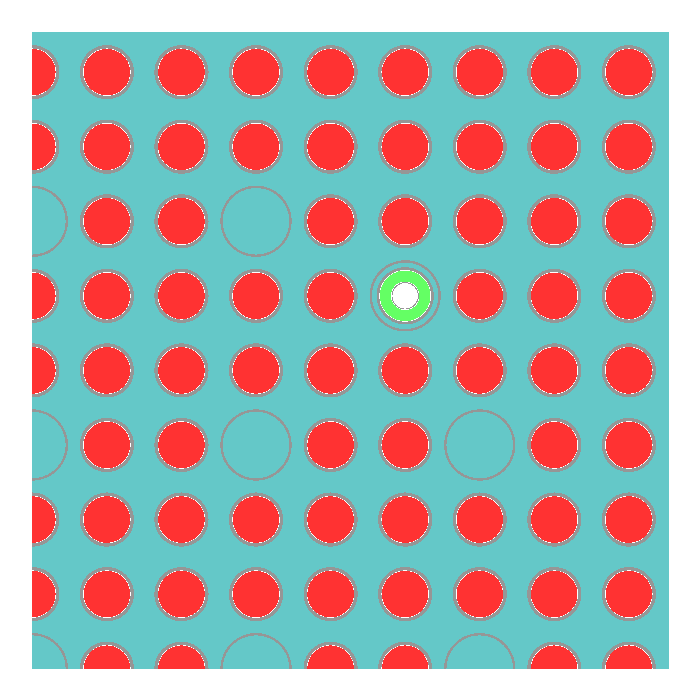

In [35]:
!convert plot.ppm plot.png
Image("plot.png")

In [36]:
settings = openmc.Settings()
settings.source = openmc.Source(space=openmc.stats.Box((0.1, 0.1, 0), (0.49*assembly_pitch, 0.49*assembly_pitch, 0)))
settings.batches = 50
settings.inactive = 10
settings.particles = 1000
settings.export_to_xml()

In [37]:
openmc.run()


       .d88888b.                             888b     d888  .d8888b.
      d88P" "Y88b                            8888b   d8888 d88P  Y88b
      888     888                            88888b.d88888 888    888
      888     888 88888b.   .d88b.  88888b.  888Y88888P888 888       
      888     888 888 "88b d8P  Y8b 888 "88b 888 Y888P 888 888       
      888     888 888  888 88888888 888  888 888  Y8P  888 888    888
      Y88b. .d88P 888 d88P Y8b.     888  888 888   "   888 Y88b  d88P
       "Y88888P"  88888P"   "Y8888  888  888 888       888  "Y8888P"
__________________888______________________________________________________
                  888
                  888

      Copyright:      2011-2016 Massachusetts Institute of Technology
      License:        http://openmc.readthedocs.org/en/latest/license.html
      Version:        0.7.1
      Git SHA1:       6a2743f1e12fbc0745ff770f22df8847af859e90
      Date/Time:      2016-05-01 05:23:22

 ========================>     INITIALIZA

0

## Tallies

Okay, that was cool, but $k_\text{eff}$ isn't everyting.  We also want to know reaction rates so we can compute the power distribution, depletion rate, etc.  If we want pin-by-pin reaction rates, we have two options.  First, we can use a tally mesh.  This will lay a rectangular grid over the geometry and tally the reaction rates in each mesh bin.

In [38]:
tallies = openmc.Tallies()

mesh = openmc.Mesh()
mesh.dimension = lattice.dimension
#mesh.dimension = [3, 3] # Only show a few cells for this example
mesh.lower_left = lattice.lower_left
mesh.width = lattice.pitch

mesh_filt = openmc.Filter(type='mesh')
mesh_filt.mesh = mesh

t = openmc.Tally(1)
t.filters = [mesh_filt]
t.scores = ['total', 'fission']
t.nuclides = ['total', 'U-235']
tallies.append(t)

Or we can use something called a "distribcell" filter.  Note that the bin specifies a cell id.

In [39]:
dist_filt = openmc.Filter(type='distribcell', bins=[fuel.id])
t = openmc.Tally(2)
t.filters = [dist_filt]
t.scores = ['total', 'fission']
t.nuclides = ['total', 'U-235']
tallies.append(t)

tallies.export_to_xml()

In [40]:
openmc.run()


       .d88888b.                             888b     d888  .d8888b.
      d88P" "Y88b                            8888b   d8888 d88P  Y88b
      888     888                            88888b.d88888 888    888
      888     888 88888b.   .d88b.  88888b.  888Y88888P888 888       
      888     888 888 "88b d8P  Y8b 888 "88b 888 Y888P 888 888       
      888     888 888  888 88888888 888  888 888  Y8P  888 888    888
      Y88b. .d88P 888 d88P Y8b.     888  888 888   "   888 Y88b  d88P
       "Y88888P"  88888P"   "Y8888  888  888 888       888  "Y8888P"
__________________888______________________________________________________
                  888
                  888

      Copyright:      2011-2016 Massachusetts Institute of Technology
      License:        http://openmc.readthedocs.org/en/latest/license.html
      Version:        0.7.1
      Git SHA1:       6a2743f1e12fbc0745ff770f22df8847af859e90
      Date/Time:      2016-05-01 05:23:58

 ========================>     INITIALIZA

0

In [41]:
!cat tallies.out


 ============================>     TALLY 1     <============================

 Mesh Index (1, 1)
   Total Material
     Total Reaction Rate                  0.142318       +/- 3.88721E-03
     Fission Rate                         0.0            +/- 0.0
   U-235.71c
     Total Reaction Rate                  0.0            +/- 0.0
     Fission Rate                         0.0            +/- 0.0
 Mesh Index (1, 2)
   Total Material
     Total Reaction Rate                  0.230560       +/- 4.54198E-03
     Fission Rate                         4.30304E-03    +/- 2.11013E-04
   U-235.71c
     Total Reaction Rate                  5.46468E-03    +/- 2.56397E-04
     Fission Rate                         4.09355E-03    +/- 2.10430E-04
 Mesh Index (1, 3)
   Total Material
     Total Reaction Rate                  0.228260       +/- 4.05758E-03
     Fission Rate                         4.28163E-03    +/- 1.66809E-04
   U-235.71c
     Total Reaction Rate                  5.45870E-03    +/- 1.98

## Distributed materials

In a depletion problem, every fuel pin might need its own unique material.  We have a feature called "distributed materials" which makes this easier.

In [42]:
many_uo2_mats = []
for i in range(72):
    m = openmc.Material(name='uo2')
    m.add_nuclide('U-235', 0.02115, 'wo')
    m.add_nuclide('U-238', 0.86032, 'wo')
    m.add_nuclide('O-16', 0.11852, 'wo')
    m.set_density('g/cm3', 10.3)
    many_uo2_mats.append(m)

mf.add_materials(many_uo2_mats)
mf.export_to_xml()

In [43]:
fuel.fill = many_uo2_mats
g.export_to_xml()

In [44]:
openmc.plot_geometry()


       .d88888b.                             888b     d888  .d8888b.
      d88P" "Y88b                            8888b   d8888 d88P  Y88b
      888     888                            88888b.d88888 888    888
      888     888 88888b.   .d88b.  88888b.  888Y88888P888 888       
      888     888 888 "88b d8P  Y8b 888 "88b 888 Y888P 888 888       
      888     888 888  888 88888888 888  888 888  Y8P  888 888    888
      Y88b. .d88P 888 d88P Y8b.     888  888 888   "   888 Y88b  d88P
       "Y88888P"  88888P"   "Y8888  888  888 888       888  "Y8888P"
__________________888______________________________________________________
                  888
                  888

      Copyright:      2011-2016 Massachusetts Institute of Technology
      License:        http://openmc.readthedocs.org/en/latest/license.html
      Version:        0.7.1
      Git SHA1:       6a2743f1e12fbc0745ff770f22df8847af859e90
      Date/Time:      2016-05-01 05:24:33

 ========================>     INITIALIZA

0

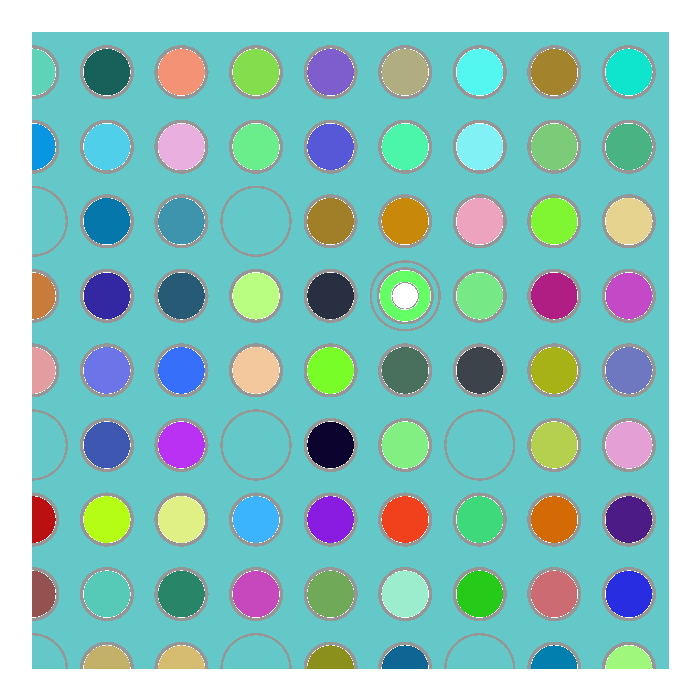

In [45]:
!convert plot.ppm plot.png
Image("plot.png")